## Project 3 - Wikipedia Articles

### Import Statements

In [1]:
import networkx as nx
import matplotlib.pyplot as plot
import time
import wikipedia as wiki
from collections import deque
%matplotlib inline

### Graph class

In [2]:
class Graph:
	# a dictionary and graph object
	def __init__(self):
		self.visual = []
		self.path = []
		self.path2 = []
		self.G = nx.Graph()

	# adds an edge to the dictionary
	def addEdge(self,a,b):
		temp = [a,b]
		self.visual.append(temp)
		self.G.add_edge(a,b, color='green')

	def draw(self):
		pos = nx.circular_layout(self.G)

		edges = self.G.edges()
		colors = [self.G[u][v]['color'] for u,v in edges]
		nx.draw_networkx(self.G, pos, edge_color= colors, node_color='violet', node_size=600)
		plot.show()

	# changes edge color to green to red for path
	def red(self,a,b):
		# removes the black edge and adds it back but in green
		self.G.remove_edge(a,b)
		self.G.add_edge(a,b, color='red')
	
	# gets a sublist of the path list
	def getSublist(self, begin, last, first):
		list = []
		curr = begin
		# iterates and adds all names in sublist range
		while(curr < last):
			# gets sublist of path if first is true
			if first:
				list.append(self.path[curr])
			else:
				list.append(self.path2[curr])
			curr += 1
		return list

	# shows the path for path
	def showPath(self, first, length):
		list1 = self.getSublist(0, length - 1, first)
		list2 = self.getSublist(1, length, first)

		# changes edges to green
		for i in range(length - 1):
			self.red(list1[i], list2[i])

	# compares for shortest path and displays path
	def compare(self):
		length = len(self.path)
		length2 = len(self.path2)

		# will show the path for shortest path
		if length2 < length:
			plot.title(label='{n} is Shortest Path'.format(n=self.path2[length2 -1]))
			self.showPath(False, length2)
		# will show both paths
		elif length == length2:
			plot.title(label='Equal Paths')
			self.showPath(True, length)
			self.showPath(False, length2)
		else:
			plot.title(label='{n} is Shortest Path'.format(n=self.path[length -1]))
			self.showPath(True, length)

	# call for Dijkstras algorithm
	def Dijkstras(self, start, target1, target2):
		self.path = nx.shortest_path(self.G, source=start, target=target1, weight=None)
		self.path2 = nx.shortest_path(self.G, source=start, target=target2, weight=None)
		self.compare()
        
	def detectEdge(self, a, b):
		myEdge = list(filter(lambda x: x == [a,b], self.visual))
		if len(myEdge) == 0:
			return False
		return True

	    # Populate the graph class with relevant articles (from source to destination)
	def populateGraph(self, currentLayer):
		
		nextLayer = []
		for i in currentLayer:
			try:
				temp = wiki.WikipediaPage(title=i).links
				print(len(temp))
			except Exception:
				pass
			for j in temp:
				try:
					self.addEdge(str(i), str(j))
					if j not in nextLayer:
						nextLayer.append(str(j))
				except Exception:
					pass
		return nextLayer

### Example of a Graph object being used

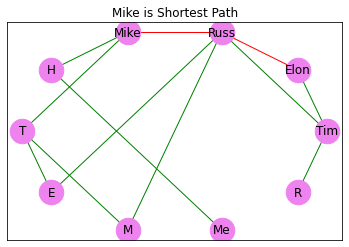

In [3]:
# Initialize graph object
G = Graph()

# Add some randomly chosen edges 
G.addEdge("Tim", "Elon")
G.addEdge("Russ", "Elon")
G.addEdge("Russ", "Mike")
G.addEdge("H", "Mike")
G.addEdge("Mike", "T")
G.addEdge("Russ", "Tim")
 
G.addEdge("T", "E")
G.addEdge("Russ", "E")
G.addEdge("Russ", "M")
G.addEdge("H", "Me")
G.addEdge("M", "T")
G.addEdge("R", "Tim")

# Check shortest pathfinding algorithm function
G. Dijkstras("Elon", "Mike", "T")
 
# Draw graph
G.draw()

### Display Class - to back the graphical user interface

In [4]:
import tkinter
import requests
from tkinter import *
from tkinter import messagebox

In [5]:
class Display:
    def __init__(self):
        self.root = Tk()
        self.searchData = []
        self.titles = []
        self.search = []
        self.target1 = []
        self.target2 = []

    # returns the search input
    def getSeachData(self):
        return self.searchData
    
    # initial window to get data
    def callDisplay(self):
     
        # function for button to set the input
        def getSearchResults():
            start = s.get()
            dest1 = fd.get()
            dest2 =sd.get()

            # input validation to see if there is missing input
            if(start == '' or dest1 == '' or dest2 == ''):
                messagebox.showinfo("showinfo", "Input Error: One or more fields are empty.")
            else:
                self.searchData = [start, dest1, dest2]
                self.root.quit()
                self.root.withdraw()

        #display settings for the window
        self.root.title("Search Page Titles")
        self.root.geometry("800x400")
        self.root['background']='#3d4849'

        ins = Label(self.root, text="For each field, enter a page title. The pages will be searched for in the API. Then you will be prompted to select the exact pages.", fg='#ffffff')
        ins['background']='#3d4849'
        ins.pack(pady=20)

        startLabel = Label(self.root, text="Search Title For Start Page", fg='#ffffff')
        startLabel['background']='#3d4849'
        startLabel.pack()
    
        s = Entry(self.root, width=50)
        s.pack()

        dest1Label = Label(self.root, text="Search Title For First Target Page", fg='#ffffff')
        dest1Label['background']='#3d4849'
        dest1Label.pack()

        fd = Entry(self.root, width=50)
        fd.pack()

        dest2Label = Label(self.root, text="Search Title For Second Target Page", fg='#ffffff')
        dest2Label['background']='#3d4849'
        dest2Label.pack()

        sd = Entry(self.root, width=50)
        sd.pack()

        button = Button(self.root, text="Submit To Search", command=getSearchResults)
        button['background']='#6699cc'
        button.pack(pady=15)

        self.root.mainloop()

    # breaks down the search query to get 10 options to choose from
    def getResultList(self, result):
        data = []
        query = result['query']
        searchRes = query['search']

        resultCount = len(searchRes)

        for x in range(resultCount):
            res = searchRes[x]
            title = res['title']
            data.insert(x,title)
        return data;
    
    # 
    def getOptions(self, data):
        url = "http://en.wikipedia.org/w/api.php?action=query&list=search&format=json&srsearch=";
        searchUrl = url + data[0]
        dest1Url = url + data[1]
        dest2Url = url + data[2]

        # gets the responses from all the search results
        res = requests.get(searchUrl);
        map = res.json()
        self.search = self.getResultList(map);

        res2 = requests.get(dest1Url);
        map2 = res2.json()
        self.target1 = self.getResultList(map2);

        res3 = requests.get(dest2Url);
        map3 = res3.json()
        self.target2 = self.getResultList(map3);


    # function for user to choose options when they have searched for it
    def chooseStartOptions(self):

        def selected():
            # inserts the selected choices to the titles array
            self.titles.insert(0, choice.get())
            self.titles.insert(1, choice1.get())
            self.titles.insert(2, choice2.get())

            # quits once titles are in array
            top.quit()


        # initializes options window
        top = Toplevel();
        top.title("Select Titles")
        top.geometry("800x400")
        top['background']='#3d4849'

        choose = Label(top, text="Select The Title Of The Start Page:", fg='#ffffff')
        choose['background']='#3d4849'
        choose.pack()

        lab = Label(top, text="If none are selected then the first options in each list will be chosen.", fg='#ffffff')
        lab['background']='#3d4849'
        lab.pack()

        # initializes the choices for OptionMenu's
        choice = StringVar()
        choice.set(self.search[0])
        choice1 = StringVar()
        choice1.set(self.target1[0])
        choice2 = StringVar()
        choice2.set(self.target2[0])

        #options menu for all the searches
        option = OptionMenu(top,choice, *self.search)
        option.config(width=40)
        #option["background"] = '#3d4849'
        option.pack(pady=20)


        option1 = OptionMenu(top,choice1, *self.target1)
        option1.config(width=40)
        option1.pack(pady=20)

        option2 = OptionMenu(top,choice2, *self.target2)
        option2.config(width=40)
        option2.pack(pady=20,)

        # button will select the choices
        button = Button(top, text="Select Titles", command=selected)
        button['background']='#6699cc'
        button.pack()

        top.mainloop()
    
    # returns the titles once they are in the array
    def getTitles(self):
        return self.titles

### Driver code - to run the GUI

In [6]:
# initializes the display window and calls it
display = Display()
display.callDisplay()

# once input is gathered, it is returned
data = display.getSeachData()
# makes the request to get search options for the input data
display.getOptions(data)
display.chooseStartOptions()

# gets the titles for API requests
titlesForRequest = display.getTitles()

In [7]:
print("hello")
print(titlesForRequest[0])

hello
Umbrella


In [8]:
G = Graph();

myList = titlesForRequest[0]
for i in range(2):
    print("i = ", i)
    myList = G.populateGraph(myList)

i =  0
254
189
252
336
252
216
216
276
i =  1
276
1105
254
211
690
771
1228
1004
335
63
174
252
287
211
416
145
267
763
291
192
373
886
407
516
418
411
436
483
441
81
994
195
616
604
184
306
204
152
209
695
217
195
166
111
252
857
91
164
1193
26
173
522
447
716
972
312
254
513
1144
124
1513
243
462
265
159
118
114
214
561
1427
927
598
196
1413
1228
721
237
128
924
312
508
925
210
216
400
139
81
757
365
968
1314
352
537
657
159
2464
92
127
196
355
119
415
44
146
633
604
189
340
295
357
196
427
1040
1651
194
77
473
429
455
150
122
62
635
256
129
232
217
393
407
486
657
141
180
579
822
77
1006
975
338
18
255
503
198
657
336
17
221
1213
269
271
125
757
132
412
1000
671
99
195
14
537
129
593
127
92
1167
291


C:\Users\aditi\anaconda3\lib\site-packages\wikipedia\wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file C:\Users\aditi\anaconda3\lib\site-packages\wikipedia\wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


179
263
125
1293
179
111
636
626
110
79
968
249
286
399
474
520
569
296
294
531
224
952
296
435
309
320
329
172
174
215
593
340
230
221
204
217
129
291
215
215
215
215
152
157
179
154
74
288
291
280
263
256
294
155
294
1004
664
664
664
837
79
265
409
593
373
172
215
306
159
129
129
129
129
129
128
111
254
254
14
687
557
294
1260
37
514
209
595
672
994
702
265
366
291
133
703
1173
471
656
364
493
967
886
217
30
59
241
77
282
353
178
112
154
136
204
280
687
237
679
1213
1216
357
629
87
49
87
98
254
84
112
560
514
419
336
412
78
569
555
8
412
265
246
241
241
59
79
112
289
289
114
306
306
178
87
98
773
158
46
14
241
687
703
909
928
172
238
134
54
179
1232
271
61
61
257
119
119
257
21
398
600
569
769
769
572
209
296
526
58
88
88
248
599
791
187
478
76
156
994
236
251
904
2155
291
108
176
345
357
241
796
452
138
9
714
209
996
198
197
382
221
892
254
908
87
459
14
424
1016
796
266
590
414
71
282
40
112
414
206
961
278
722
265
109
393
638
86
687
17
473
21
241
209
62
56
280
993
718
968
1378
637

In [ ]:
st = time.time()
myList = G.populateGraph(myList)
print("Adding 2nd layer took ", time.time()-st, " seconds.")

345
276
26
1105
211
299
233
596
657
329
293
43
129
771
1004
335
1083
69
106
772
332
117
345
24
204
252
287
769
214
546
145
267
599
291
192
886
466
452
81
29
478
672
156
994
195
604
135
486
306
195
166
111
252
857
91
702
291
108
226
164
136
345
772
173
447
716
254
440
513
124
547
198
703
344
565
1513
243
44
462
118
114
214
561
1427
927
196
480
796
1228
721
1323
274
2571
312
73
210
216
757
139
81
113
886
757
365
968
1314
352
414
222
182
537
657
159
2464
92
127
196
355
119
44
146
189
556
196
427
232
1651
351
194
77
433
434
150
122
62
256
129
232
92
443
687
461
393
486
413
461
427
422
214
141
180
173
579
822
318
241
77
975
333
157
679
255
503
198
657
336
221
1830
1213
269
1216
271
101
535
507
126
629
267
125
132
412
99
195
107
14
129
69
51
286
127
178
113
92
254
1167
125
221
1293
289
179
83
79
249
104
566
397
569
296
952
296
435
309
320
214
160
190
204
173
221
356
80
281
159
167
178
135
132
291
221
169
221
152
157
169
535
299
295
250
273
24
153
329
1004
1119
664
837
439
221
10
306
159
204


In [ ]:
print("Edge between umbrella and rain exists: ", G.detectEdge("Umbrella", "Rain"))
print("Edge between rain and terrain exists: ", G.detectEdge("Rain", "Terrain"))

In [ ]:
Dijkstras(self, "Umbrella", "Rain", "Terrain")
G.drawGraph()

In [26]:
st = time.time()
temp = wiki.WikipediaPage(title="Umbrella").links
et = time.time()

print("Requesting 1 article's internal links takes ", et-st, " seconds.")

Requesting 1 article's internal links takes  0.7284395694732666  seconds.


#### As mentioned in the cell above, a request to obtain the internal links of one Wikipedia article takes about 0.7 seconds. In our example, Umbrella links directly to Rain, which links directly to Terrain. This involves two "layers" of the graph extending out from the Umbrella article, which takes us approximately 12 minutes to append to the graph.

### Map Implementation - Map Class

In [9]:
import requests
from collections import deque
import time

In [10]:
class Map:
    page_links = dict()
    link_parents = dict()
    origin = ""
    destination_1 = ""
    destination_2 = ""
    distance_1 = 0
    distance_2 = 0
    dest1_found = False
    dest2_found = False
    def _init_(self, array):
        origin = array[0]
        destination_1 = array[1]
        destination_2 = array[2]
    #request and parses links on given pages
    def get_all_links(title):
        s = requests.Session()
        #request format
        URL = "https://en.wikipedia.org/w/api.php"
        PARAMS = {
        "action": "query",
        "format": "json",
        "titles": title,
        "prop": "links"
        }
        response = s.get(url=URL, params=PARAMS)
        data = response.json()
        pages = data["query"]["pages"]
        page_titles = []
        #collect links into page_titles
        #pages containes one key,val pair
        for key, val in pages.items():
            if "pageid" in val:
                for link in val["links"]:
                    page_titles.append(link.get("title"))
        return page_titles

    #checks if either destination has been reached
    def check_for_destination():
        if page_links.get(destination_1) is not None:
            global dest1_found
            dest1_found = True
            global distance_1
            distance_1 = page_links.get(destination_1)
        if destination_2 in page_links:
            global dest2_found
            dest2_found = True
            global distance_2
            distance_2 = page_links.get(destination_2)
    #BFS function to fill map with adjacent links
    def scraper(site, count):
        queue = deque()
        gotlinks = get_all_links(site)
        for l in gotlinks:
            queue.append([l, site, count])
        while queue:
            check_for_destination()
            if ((not dest1_found) or (not dest2_found)) and (count < 20):
                temp, base, dist = queue.popleft()
                if temp in page_links and (dist > page_links.get(temp)):
                    continue
                elif temp in page_links and (dist < page_links.get(temp)):
                    page_links[temp] = dist
                    link_parents[temp] = base
                page_links[temp] = dist
                link_parents[temp] = base
                gotlinks = get_all_links(temp)
                for i in gotlinks:
                    queue.append([i, temp, dist+1])
            else:
                break
    #outputs paths to each destination, if found
    def output_format():
        global origin
        #if both destinations are found
        if (dest1_found and dest2_found):
            print("Destination articles found!")
            print("Path to", destination_1 + ":")
            stack = deque()
            current_entry = destination_1
            while not current_entry == origin:
                stack.append(link_parents.get(current_entry))
                current_entry = link_parents.get(current_entry)
            while stack:
                print(stack.pop())
            print(destination_1)
            print("Distance from origin:", distance_1, "\n")
            print("Path to", destination_2 + ":")
            current_entry = destination_2
            while not current_entry == origin:
                stack.append(link_parents.get(current_entry))
                current_entry = link_parents.get(current_entry)
            while stack:
                print(stack.pop())
            print(destination_2)
            print("Distance from origin:", distance_2, "\n")
            if (distance_1 < distance_2):
                print(destination_1, "is closer to", origin, "than", destination_2)
                print("It is", distance_1, "connections away from", origin )
            elif (distance_2 < distance_1):
                print(destination_2, "is closer to", origin, "than", destination_1)
                print("It is", distance_2, "connections away from", origin )
            elif (distance_1 == distance_2):
                print(destination_1, "and", destination_2, "are the same amount of connections away from", origin)
        #if only destination 1 is found
        if dest1_found and (not dest2_found):
            print("Only destination article 1 found!")
            print("Path to", destination_1 + ":")
            stack = deque()
            current_entry = destination_1
            while not current_entry == origin:
                stack.append(link_parents.get(current_entry))
                current_entry = link_parents.get(current_entry)
            print(current_entry)
            while stack.empty:
                print(stack.pop())
            print("Distance from origin:", distance_1, "\n")
        #if only destination 2 is found
        if dest2_found and (not dest1_found):
            print("Only destination article 2 found!")
            print("Path to", destination_2 + ":")
            stack = deque()
            current_entry = destination_2
            while not current_entry == origin:
                stack.append(link_parents.get(current_entry))
                current_entry = link_parents.get(current_entry)
            print(current_entry)
            while stack:
                print(stack.pop())
            print("Distance from origin:", distance_2, "\n")
        #if neither destination is found
        if (not dest2_found) and (not dest1_found):
            print("Unable to find destination articles.")
    #initializes map and prepares output
    def create_map():
        start_time = time.time()
        page_links[origin] = 0
        link_parents[origin] = None
        counter = 1
        #call function to scrape page for valid urls
        scraper(origin, counter)
        output_format()
        print("--- %s seconds ---" % (time.time() - start_time))

### Map implementation - driver code

In [ ]:
myMap = Map(titlesForRequest)
myMap.create_map